In [31]:
import os
os.makedirs("charts", exist_ok=True)

# Superstore Sales Analysis

This project analyzes retail sales data to uncover trends in revenue,
profitability, and discount impact.

The goal is to demonstrate practical data analysis skills using
Pandas and Matplotlib.

## 1 Import Libraries and Load Dataset

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../data/superstore_dataset.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## 2 Data Cleaning

- Convert date columns to datetime
- Check missing values
- Verify data types

In [22]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      1
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## 3 Exploratory Data Analysis

###  Sales by Category

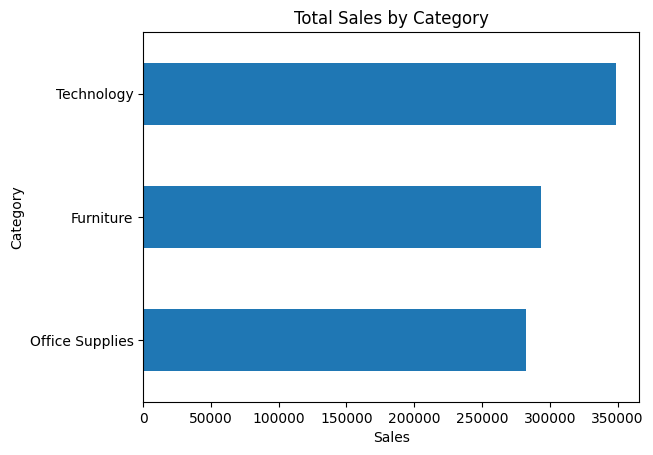

In [26]:
sales_cat = data.groupby('Category')['Sales'].sum().sort_values()

sales_cat.plot(kind='barh')
plt.title("Total Sales by Category")
plt.xlabel("Sales")
plt.savefig("charts/sales_by_category.png", dpi=300, bbox_inches="tight")
plt.show()

### Monthly Sales Trend

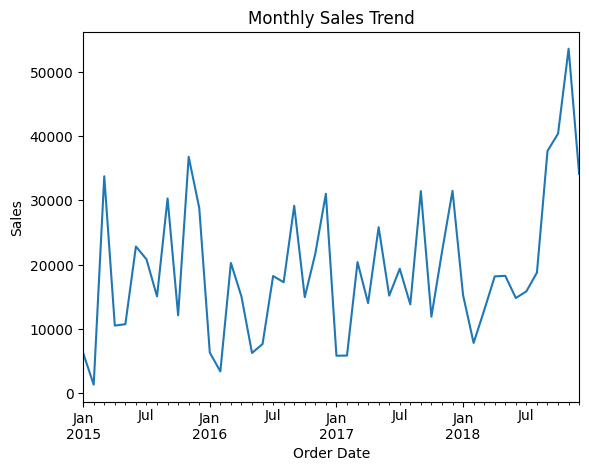

In [27]:
monthly_sales = data.set_index('Order Date').resample('M')['Sales'].sum()

monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.savefig("charts/monthly_sales_trend.png", dpi=300, bbox_inches="tight")
plt.show()

###  Profit vs Discount

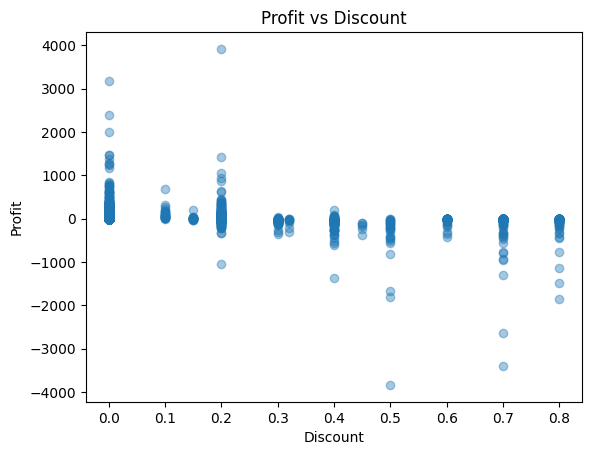

In [28]:
plt.scatter(data['Discount'], data['Profit'], alpha=0.4)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Profit vs Discount")
plt.savefig("charts/profit_vs_discount.png", dpi=300, bbox_inches="tight")
plt.show()

### Profit Margin Per Category

In [34]:
margin = data.groupby("Category").agg({
    "Sales": "sum",
    "Profit": "sum"
})

margin["Profit Margin %"] = (margin["Profit"] / margin["Sales"] * 100).round(2)
margin.sort_values("Profit Margin %", ascending=False)

,Sales,Profit,Profit Margin %
Category,,,
Office Supplies,282588.175,45325.0946,16.04
Technology,348512.924,44645.7246,12.81
Furniture,293702.570,5213.1118,1.77


### Top 10 Customers by Revenue

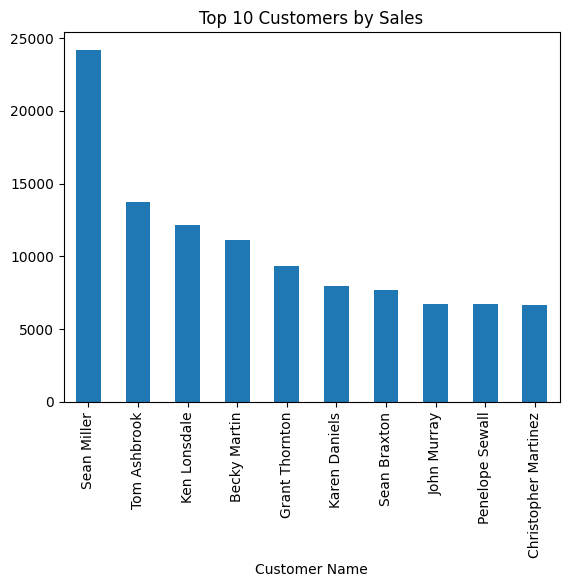

In [35]:
top_customers = (
    data.groupby("Customer Name")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers.plot(kind="bar")
plt.title("Top 10 Customers by Sales")
plt.savefig("charts/top_customers.png", bbox_inches="tight")
plt.show()

### Region vs Category

In [36]:
pivot = pd.pivot_table(
    data,
    values="Sales",
    index="Region",
    columns="Category",
    aggfunc="sum"
)

pivot

Category,Furniture,Office Supplies,Technology
Region,,,
Central,71456.209,50842.569,77380.382
East,72304.924,89884.694,97801.442
South,44318.462,58669.356,69697.325
West,105622.975,83191.556,103633.775


## Based on the analysis:

- Focus on high-performing categories such as Technology to maximize revenue.
- Review discount policies to prevent profit erosion.
- Optimize inventory based on seasonal sales trends.
- Retain high-value customers through targeted strategies.
- Investigate loss-making products and adjust pricing or sourcing.

Overall, data-driven decision making can significantly improve both revenue growth and operational efficiency.